Chapter 18
# 三维柱状图
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x, y
from sympy import *
# import os
# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

## 创建数据

In [2]:
f_xy = exp(- x**2 - y**2);

f_xy_fcn = lambdify([x,y],f_xy)

a = -2; b = 1
c = -1; d = 2

x_array_fine = np.linspace(a,b,300)
y_array_fine = np.linspace(c,d,300)

xx_fine,yy_fine = np.meshgrid(x_array_fine,y_array_fine)

zz_fine = f_xy_fcn(xx_fine, yy_fine)

## 可视化

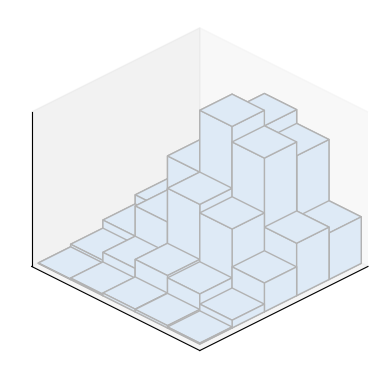

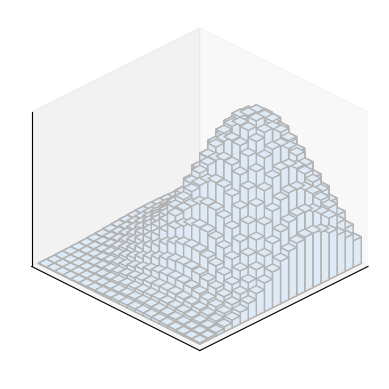

In [3]:
num_array = [5,20]

for num in num_array:
    
    x_array = np.linspace(a,b - (b - a)/num,num)
    y_array = np.linspace(c,d - (d - c)/num,num)
    
    xx,yy = np.meshgrid(x_array,y_array)
    
    xx_array = xx.ravel()
    yy_array = yy.ravel()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    zz_array = np.zeros_like(yy_array)
    
    dx = np.ones_like(yy_array)/num*(b - a)
    dy = np.ones_like(yy_array)/num*(d - c)
    dz = f_xy_fcn(xx_array, yy_array)
    
    # 三维树状图
    ax.bar3d(xx_array, yy_array, zz_array, 
             dx, dy, dz, shade=False,
             color = '#DEEAF6',
             edgecolor = '#B2B2B2')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim((a,b))
    ax.set_ylim((c,d))
    ax.set_zlim((0,zz_fine.max()))
    ax.grid(False)
    ax.view_init(azim=-135, elev=30)
    ax.set_proj_type('ortho')
    
    # fig.savefig('Figures/' + str(num) + '.svg', format='svg')